# L1 Exercise
1. Load in the data
1. Visualize and summarize the data
1. Call out anything unusual
1. Is this big data or small data 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import fnmatch

## Bee Data
Load in bee_data.csv 

### Load in the data

In [3]:
bees = pd.read_csv("bee_data.csv")
bees

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
0,041_066.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
1,041_072.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
2,041_073.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
3,041_067.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
4,041_059.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
...,...,...,...,...,...,...,...,...,...
5167,027_011.png,8/20/18,10:03,"San Jose, CA, USA",95124,-1,healthy,True,worker
5168,027_007.png,8/20/18,10:03,"San Jose, CA, USA",95124,-1,healthy,True,worker
5169,027_013.png,8/20/18,10:03,"San Jose, CA, USA",95124,-1,healthy,False,worker
5170,027_012.png,8/20/18,10:03,"San Jose, CA, USA",95124,-1,healthy,False,worker


### Visualize and Summarize

Below are some examples of exploratory tools we can use to look more closely at this data. 

In [3]:
#Count how many images we have

dir_path = 'bee_imgs'
count = len(fnmatch.filter(os.listdir(dir_path), '*.*'))
print('File Count:', count)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'bee_imgs'

In [4]:
#Compare that with the metadata in the csv file

len(bees)

5172

In [5]:
#How many occurrences of each zip code do we have? 

bees['zip code'].value_counts()

95070    2000
30607    1051
50315     973
77511     737
70115     170
95124     149
3431       92
Name: zip code, dtype: int64

<AxesSubplot: xlabel='pollen_carrying', ylabel='Count'>

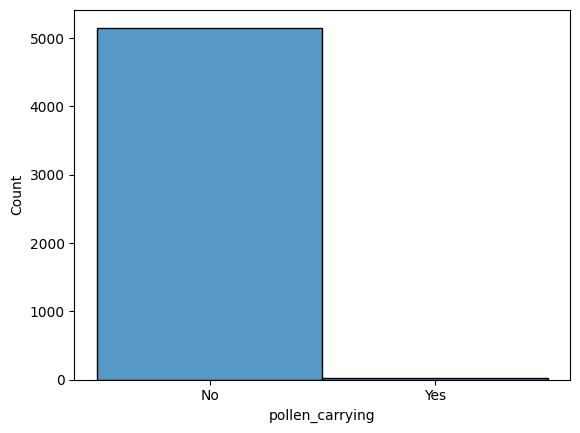

In [6]:
bees['pollen_carrying'] = bees['pollen_carrying'].replace({True: 'Yes', False: 'No'})
sns.histplot(bees['pollen_carrying'])

<AxesSubplot: xlabel='health', ylabel='Count'>

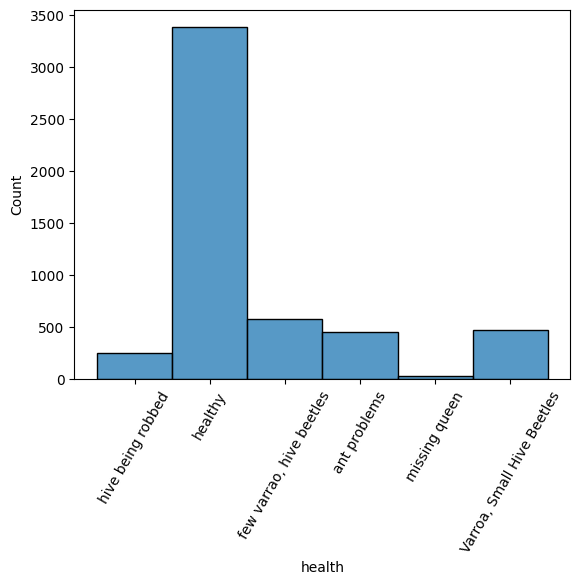

In [7]:
plt.xticks(rotation=60)
sns.histplot(bees['health'])

### Anything unusual?

- Relatively few rows of data / images
- Class imbalances, especially for pollen_carrying 

### Big data or Small data?

I would consider this a small dataset since we have images.  If we were just analyzing the CSV file it would depend on the question 
as there are several serious class imbalance problems in this dataset. 

## Carbon Monitor Data
Load in carbon_monitor.csv 

### Load in the data

In [8]:
carbon = pd.read_csv('carbon_monitor.csv')
carbon

,country,date,sector,MtCO2 per day
0,Brazil,01/01/2022,Power,0.173988
1,China,01/01/2022,Power,17.564600
2,EU27 & UK,01/01/2022,Power,1.413870
3,France,01/01/2022,Power,0.049170
4,Germany,01/01/2022,Power,0.305948
...,...,...,...,...
1652,NaN,NaN,NaN,NaN
1653,carbonmonitor.org,NaN,NaN,NaN
1654,"April 14th, 2023",NaN,NaN,NaN
1655,NaN,NaN,NaN,NaN


### Visualize and Summarize

Below are some examples of exploratory tools we can use to look more closely at this data. 

In [9]:
#How many occurrences of each Country do we have? (Note there is some cleanup to do here!) 

carbon['country'].value_counts()

Brazil               118
China                118
EU27 & UK            118
France               118
Germany              118
India                118
Italy                118
Japan                118
ROW                  118
Russia               118
Spain                118
UK                   118
US                   118
WORLD                118
carbonmonitor.org      1
April 14th, 2023       1
Name: country, dtype: int64

In [10]:
#What about sectors? 

carbon['sector'].value_counts()

Power    1652
Name: sector, dtype: int64

<AxesSubplot: xlabel='MtCO2 per day', ylabel='Density'>

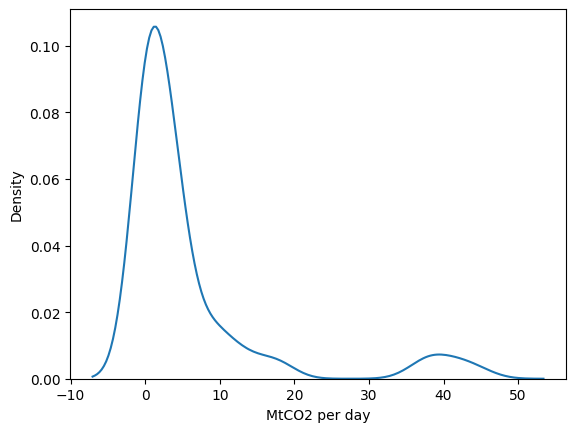

In [11]:
#What is the distribution of the continuous variable? 

sns.kdeplot(carbon['MtCO2 per day'])

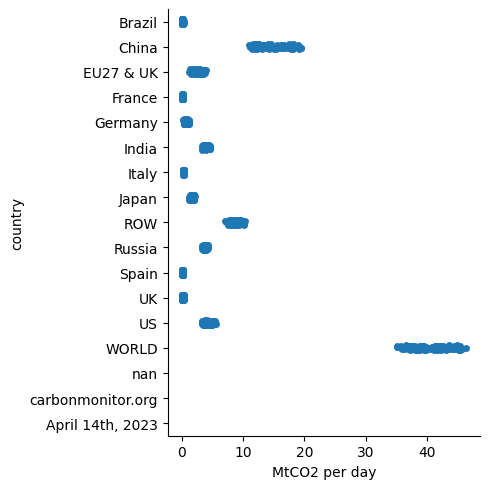

In [12]:
#Curious about where that cluster of high values is coming from?  Let's do a categorical plot by country. Notice how multivariate analysis can show you some interesting patterns. 

sns.catplot(data=carbon, x="MtCO2 per day", y="country", kind="strip")

### Anything unusual?

- There is definitely a need for some data cleanup in this dataset
- This is a pretty small set of data with only 118 values per country
- There are some pretty consistent patterns in the data

### Big data or Small data?

I would consider this a small dataset for most types of analysis. Fortunately there seem to be some consistent patterns between CO2 levels and country so it might be relatively simple to generate additional synthetic data. 

## Daily Treasury Data
Load in daily_treasury.csv 

### Load in the data

In [13]:
treasury = pd.read_csv('daily_treasury.csv')
treasury

,Record Date,Type of Account,Transaction Type,Transaction Category,Transaction Category Description,Transactions Today,Transactions Month to Date,Transactions Fiscal Year to Date,Table Number,Table Name,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,2023-04-12,Treasury General Account (TGA),Deposits,Dept of Agriculture (USDA) - misc,NaN,13,107,1885,II,Deposits and Withdrawals of Operating Cash,1,2023,3,2023,2,4,12
1,2023-04-12,Treasury General Account (TGA),Deposits,USDA - Commodity Credit Corporation,NaN,34,291,3950,II,Deposits and Withdrawals of Operating Cash,2,2023,3,2023,2,4,12
2,2023-04-12,Treasury General Account (TGA),Deposits,USDA - Federal Crop Insurance Corp Fund,NaN,0,0,2817,II,Deposits and Withdrawals of Operating Cash,3,2023,3,2023,2,4,12
3,2023-04-12,Treasury General Account (TGA),Deposits,USDA - Loan Repayments,NaN,13,143,3859,II,Deposits and Withdrawals of Operating Cash,4,2023,3,2023,2,4,12
4,2023-04-12,Treasury General Account (TGA),Deposits,Dept of Commerce (DOC),NaN,16,126,2356,II,Deposits and Withdrawals of Operating Cash,5,2023,3,2023,2,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142555,2018-04-13,Federal Reserve Account,Withdrawals,Other Withdrawals,Military Active Duty Pay (EFT),2910,2989,43137,II,Deposits and Withdrawals of Operating Cash,62,2018,3,2018,2,4,13
142556,2018-04-13,Federal Reserve Account,Withdrawals,Other Withdrawals,TARP,13,13,1231,II,Deposits and Withdrawals of Operating Cash,63,2018,3,2018,2,4,13
142557,2018-04-13,Federal Reserve Account,Withdrawals,Other Withdrawals,Unclassified,934,14202,147091,II,Deposits and Withdrawals of Operating Cash,64,2018,3,2018,2,4,13
142558,2018-04-13,Federal Reserve Account,Withdrawals,Transfers to Depositaries,NaN,0,0,0,II,Deposits and Withdrawals of Operating Cash,66,2018,3,2018,2,4,13


In [14]:
#Quick row and column count 

treasury.shape

(142560, 17)

### Visualize and Summarize

In [15]:
#How many occurrences of some of our categorical values do we have? 

display(treasury['Type of Account'].value_counts())
display(treasury['Transaction Type'].value_counts())
display(treasury['Transaction Category'].value_counts())

Federal Reserve Account                       76192
Treasury General Account (TGA)                63848
Short-Term Cash Investments                    2017
Treasury General Account Total Deposits         247
Treasury General Account Total Withdrawals      247
Other Withdrawals                                 9
Name: Type of Account, dtype: int64

Withdrawals    85906
Deposits       56654
Name: Transaction Type, dtype: int64

Other Withdrawals                                   5739
Other Deposits                                      2452
Housing and Urban Development programs              2058
Justice Department programs                         2058
Dept of Commerce (DOC)                              1718
                                                    ... 
Military Active Duty Pay (EFT)                         1
Interntl Security Assistance (DSCA)                    1
Federal Crop Ins. Corp.                                1
Agriculture                                            1
ShTransfersCtohFederalmReserve Account (Table V)       1
Name: Transaction Category, Length: 192, dtype: int64

<AxesSubplot: >

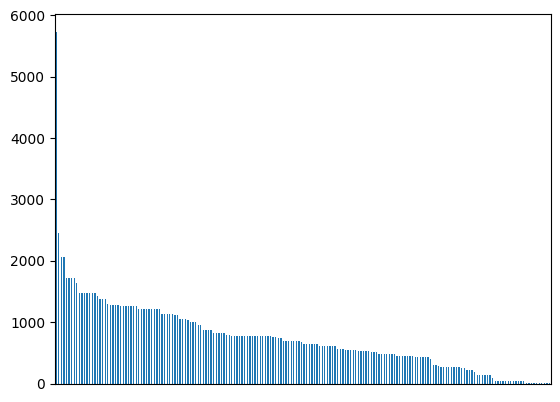

In [16]:
#Lots of unique values in Transaction Category... let's plot these counts out to see if anything sticks out?

treasury['Transaction Category'].value_counts().plot(kind='bar', xticks=[])

<AxesSubplot: >

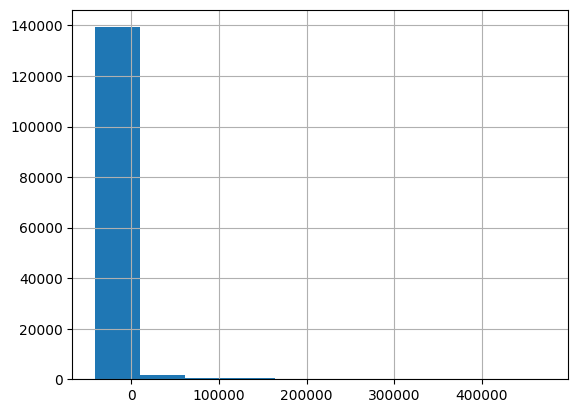

In [17]:
#How about some histograms? 

display(treasury['Transactions Today'].hist())


<AxesSubplot: >

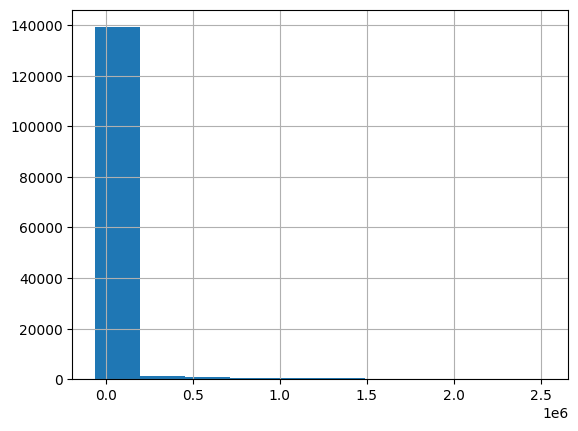

In [18]:
display(treasury['Transactions Month to Date'].hist())

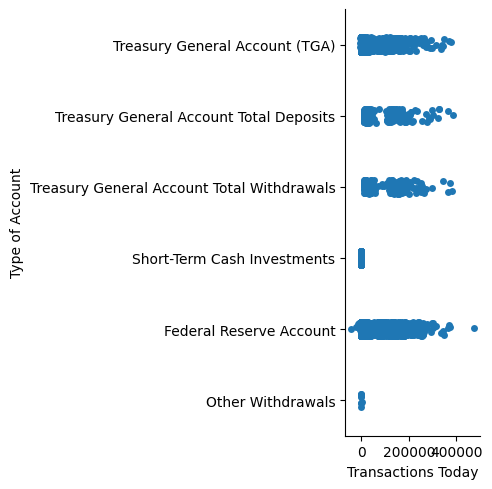

In [19]:
 #Let's see if there is a relationship between type of account and transaction today
    
sns.catplot(data=treasury, x="Transactions Today", y="Type of Account", kind="strip")

<AxesSubplot: xlabel='Record Date', ylabel='Transactions Today'>

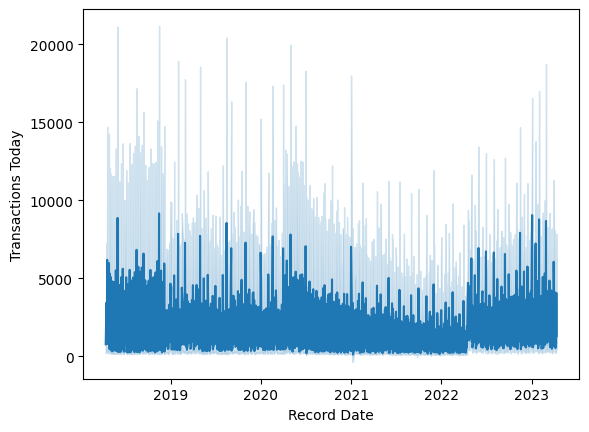

In [20]:
#What about date? (Maybe a slight uptick in 2023?) 
treasury['Record Date'] = pd.to_datetime(treasury['Record Date'])
sns.lineplot(data = treasury, x = "Record Date", y = "Transactions Today")

### Anything unusual?

- There are a lot of different categories for Transaction type
- Many of these only have 1 observation 
- Other patterns seem consistent in the data but several columns have outliers

### Big data or Small data?

I would say "both!". 

On the one hand, there are approximately 150,000 rows of data and only 17 columns several of which are likely not useful. If you were using an XGBoost or similar model this is almost certainly enough data for some questions. 

On the other hand, some of these classes have very few observations meaning there are likely class imbalance problems. Also, if you wanted to use a neural network like an MLP, there may not be enough data here to sufficiently train such a model, again depending on the questions you might want to ask of the data. 

This is an example where you, the data scientist, must use your judgment about what is or is not small data. 